In [191]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
#URL for energy mix data
data_url = r"https://ourworldindata.org/grapher/energy-consumption-by-source-and-country.csv?v=1&csvType=full&useColumnShortNames=true"
main_df = pd.read_csv(data_url, 
                     storage_options = {"User-Agent":"Our World In data fetch/1.0"})

In [154]:
main_df

,Entity,Code,Year,other_renewables_consumption_equivalent_twh,biofuels_consumption_twh,solar_consumption_equivalent_twh,wind_consumption_equivalent_twh,hydro_consumption_equivalent_twh,nuclear_consumption_equivalent_twh,gas_consumption_twh,coal_consumption_twh,oil_consumption_twh
0,Africa,NaN,1971,0.523521,NaN,0.0,0.0,76.92131,0.0,18.405262,383.01230,474.30540
1,Africa,NaN,1972,0.526714,NaN,0.0,0.0,87.62504,0.0,24.670656,384.21082,510.72960
2,Africa,NaN,1973,0.542675,NaN,0.0,0.0,92.68892,0.0,39.551792,408.91030,549.80396
3,Africa,NaN,1974,0.558636,NaN,0.0,0.0,105.46715,0.0,44.518486,425.64618,569.73850
4,Africa,NaN,1975,0.549059,NaN,0.0,0.0,111.53163,0.0,53.638380,451.08047,597.67100
...,...,...,...,...,...,...,...,...,...,...,...,...
7110,Zimbabwe,ZWE,2019,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7111,Zimbabwe,ZWE,2020,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7112,Zimbabwe,ZWE,2021,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7113,Zimbabwe,ZWE,2022,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [13]:

#The first step is to build the function that takes as input a country's columns and builds an overview of its energy consumption.

In [68]:
romania_df = (main_df[main_df["Entity"] == "Romania"]
              .fillna(value=0.00)
              .sort_values(by="Year"))

In [174]:

consumption_df = romania_df.iloc[:, 3:].T
total = consumption_df.sum(axis=0)

for index, row in consumption_df.iterrows():
    new_row = index.split("_")[0]
    consumption_df.loc[f"{new_row}_percentage"] = (row / total) * 100

consumption_df

,5197,5198,5199,5200,5201,5202,5144,5145,5146,5147,...,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196
other_renewables_consumption_equivalent_twh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.612063,1.672715,1.695061,1.676444,1.395408,1.609330,1.744658,2.083868,2.065381,0.917948
biofuels_consumption_twh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.542500,1.834944,2.867389,3.187678,3.410120,4.299830,5.030261,4.657129,4.899902,4.524167
solar_consumption_equivalent_twh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.509094,5.337471,4.872208,4.939354,4.685583,4.686758,4.551359,4.456201,5.184076,4.838177
wind_consumption_equivalent_twh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.796695,19.020462,17.641676,19.712177,16.726288,17.853441,18.239578,17.207268,18.242120,19.807170
hydro_consumption_equivalent_twh,2.971774,3.060484,4.364516,4.618817,6.555645,8.199731,13.291667,21.713171,22.316397,25.063440,...,50.181973,44.792206,48.261630,38.572740,46.733860,41.070877,40.394580,45.561405,36.438950,47.375190
nuclear_consumption_equivalent_twh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,30.352350,30.079683,28.992317,29.391262,28.884258,28.532404,28.896343,28.333590,27.742414,27.895872
gas_consumption_twh,140.490260,151.466500,166.982400,176.687900,205.169020,213.253860,228.014680,231.467770,244.561900,252.425750,...,108.731250,103.708244,104.946106,112.902690,115.629870,107.749794,112.625530,115.689570,97.113430,90.859910
coal_consumption_twh,50.702454,54.605526,60.510180,66.339775,76.660410,83.290634,87.969315,92.086334,103.693080,109.054510,...,67.587770,70.089580,62.378970,62.510082,59.621580,57.781013,41.721542,47.127190,42.036320,31.723892
oil_consumption_twh,84.556404,88.137350,99.876396,105.333260,117.426770,127.266594,129.289830,138.008540,155.252380,142.951570,...,102.802720,104.600350,109.429750,115.043430,114.964090,120.234080,116.284660,124.886780,126.406590,126.519830
other_percentage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.425216,0.438877,0.444798,0.432145,0.355925,0.419296,0.472182,0.534321,0.573511,0.258969


(59,)

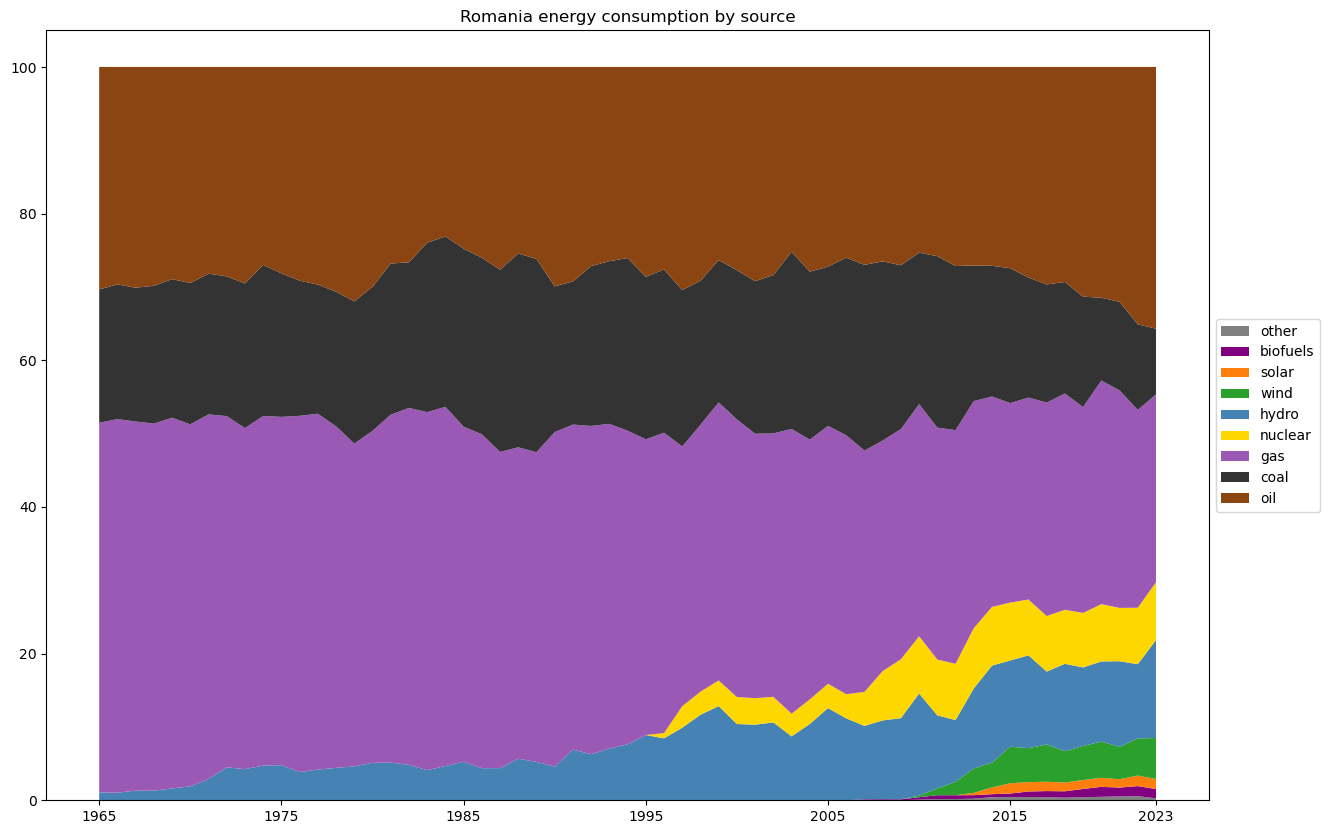

In [217]:
# Initially thought of this solution for Y axis
#column_names = romania_df.columns.tolist()
#columns = {column :romania_df[column] for column in column_names[3:]}

#But this one seems more straightforward

# X-axis
data_columns = romania_df.iloc[:, 3:]
initial_labels = data_columns.columns.tolist()
labels = [label.split('_')[0] for label in initial_labels]

#Y-axis
y_data = consumption_df.loc[consumption_df.index.str.endswith('percentage')]

# Plotting settings
plt.figure(figsize=(15, 10))
plt.title("Romania energy consumption by source")
colors = ["#808080", "#800080", "#ff7f0e", "#2ca02c", "#4682B4", "#FFD700", "#9B59B6", "#333333", "#8B4513"]

plt.stackplot(romania_df["Year"], y_data, labels=labels, colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Setting ticks and labels
xticks = xlabels = np.arange(romania_df["Year"].iloc[0], romania_df["Year"].iloc[-1], step=10)
if xticks[-1] != romania_df["Year"].iloc[-1]:
    xticks = xlabels = np.append(xticks, romania_df["Year"].iloc[-1])
plt.xticks(ticks=xticks, labels=xlabels )




# Display the plot
plt.savefig("plots/Romania_energy_mix.png")
plt.show()
